# Data Story Telling


In this exercise, I will make a data story a compelling story about a dataset of adults income compared to different demografics, social or economical factors. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This project is designed for technical audience.

The overall structure of this study will be divided in 3 blocks:
1) Investigation Questions
2) Trends or patterns identified
3) Results of visualizations and conclusions

Some of the investigation questions could be:

* Does the data set include Interesting insights?
* What patters do I see with Histograms, Bar-graphs, Scatter plots, time series.
* Can I see visual comparisson between groups?
* Looking at the plots, what are some insights I can make?
* Is there a hypothesis I can - and should - investigate further?
* What other questions are the insights leading me to ask?


### Hypothesis testing:

1) There is a significant gap of income by geneder.
2) There is a significant gap by racial condition.

## Attributes Description

From Kaggle I obtained these Data Dictionary:

https://www.kaggle.com/code/jieyima/income-classification-model

### 1. Categorical Attributes

- **workclass**: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  - Individual work category

- **education**: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  - Individual's highest education degree

- **marital-status**: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  - Individual marital status

- **occupation**: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  - Individual's occupation

- **relationship**: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  - Individual's relation in a family

- **race**: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  - Race of Individual

- **Gender**: (categorical) Female, Male.
  - Gender of Individual

- **native-country**: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  - Individual's native country

### 2. Continuous Attributes

- **age**: continuous.
  - Age of an individual

- **education-num**: number of education years, continuous.
  - Individual's years of receiving education

- **fnlwgt**: final weight, continuous.
  - The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

- **capital-gain**: continuous.
  - Capital gains

- **capital-loss**: continuous.
  - Capital losses

- **hours-per-week**: continuous.
  - Individual's working hours per week

In [156]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [157]:
# Numeric Df
df_num = df.select_dtypes(include=['number'])

# Categorical Df
df_cat = df.select_dtypes(include=['object', 'category'])

# Include income in both dataframes as this is the response variable
df_num['income'] = df['income']
df_cat['income'] = df['income']


In [158]:
#Read the adult.csv dataset
df= pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [159]:
df.shape

(48842, 15)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [161]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [162]:
# IT seems that income only has two values, either <=50K or >50K. Let's check the unique values in the income column
df['income'].unique()


array(['<=50K', '>50K'], dtype=object)

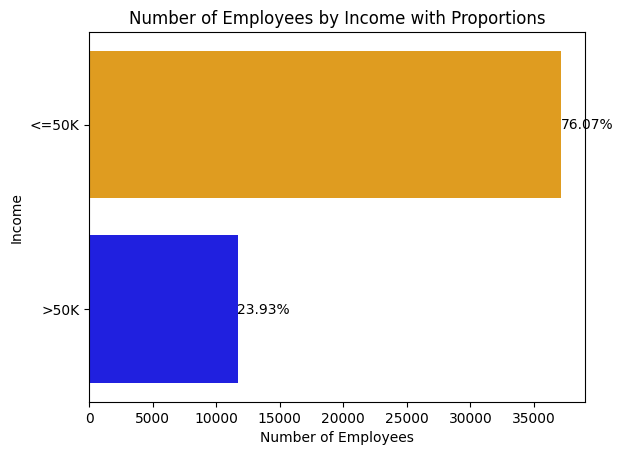

In [163]:
# Calculate the proportions
income_counts = df['income'].value_counts()
income_proportions = df['income'].value_counts(normalize=True)

# Develop the horizontal bar plot
colors = ['orange', 'blue']
ax = sns.countplot(y='income', data=df, palette=colors, hue='income', dodge=False, legend=False)

# Add the proportions to the plot
for p, proportion in zip(ax.patches, income_proportions):
    width = p.get_width()
    plt.text(width + 2000, p.get_y() + p.get_height() / 2, f'{proportion:.2%}', ha='center', va='center')

plt.xlabel('Number of Employees')
plt.ylabel('Income')
plt.title('Number of Employees by Income with Proportions')
plt.show()

In [164]:
#Identiy the didfferent edducation categories
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

### It looks that the employees with an income >50k is 3 times higher:

In [165]:
education_mapping = {
    'Preschool': 'A_Early_Truncated',
    '10th': 'A_Early_Truncated',
    '11th': 'A_Early_Truncated',
    '12th': 'A_Early_Truncated',
    '1st-4th': 'A_Early_Truncated',
    '5th-6th': 'A_Early_Truncated',
    '7th-8th': 'A_Early_Truncated',
    '9th': 'A_Early_Truncated',
    'HS-grad': 'B_Highschool',
    'Some-college': 'C_Collegue',
    'Assoc-acdm': 'C_Collegue',
    'Assoc-voc': 'C_Collegue',
    'Bachelors': 'D_Bachelors',
    'Masters': 'E_Masters',
    'Prof-school': 'E_Masters',
    'Doctorate': 'F_Doctorate',

}

df['education'] = df['education'].replace(education_mapping)

/var/folders/tt/4rw4wd117d5_9ss8qs8210jw0000gn/T/ipykernel_5773/4208264815.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='education', data=df, palette=colors, order=education_order)


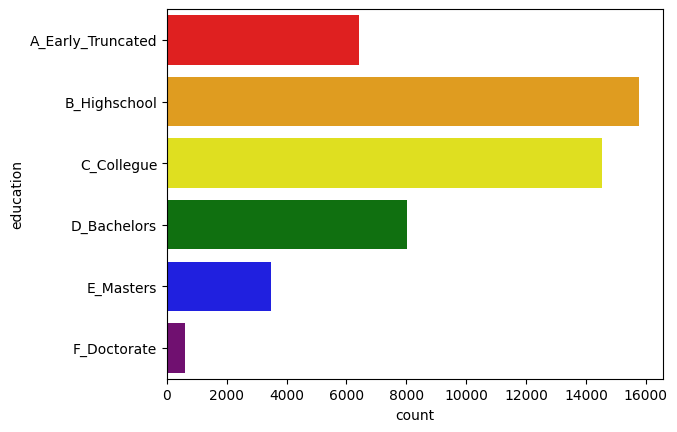

In [166]:
# Define the order of the education categories
education_order = [
    'A_Early_Truncated',
    'B_Highschool',
    'C_Collegue',
    'D_Bachelors',
    'E_Masters',
    'F_Doctorate'
]

# Reorder
df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)

# Plot the countplot with different colors per category
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
ax = sns.countplot(y='education', data=df, palette=colors, order=education_order)


In [167]:
# Review all the possible categories of marital status
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [168]:
# Merge all types of married in only one category "Married"
married_mapping = {
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married',
}

df['marital-status'] = df['marital-status'].replace(married_mapping)


In [169]:
df['marital-status'].unique()

array(['Never-married', 'Married', 'Widowed', 'Divorced', 'Separated'],
      dtype=object)

In [170]:
# Review the categories of Workclass
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [171]:
# Review the categories of Occupation
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [172]:
# Review the categories of Relationship
df['relationship'].unique()


array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [173]:
# Review the categories of Age
df['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

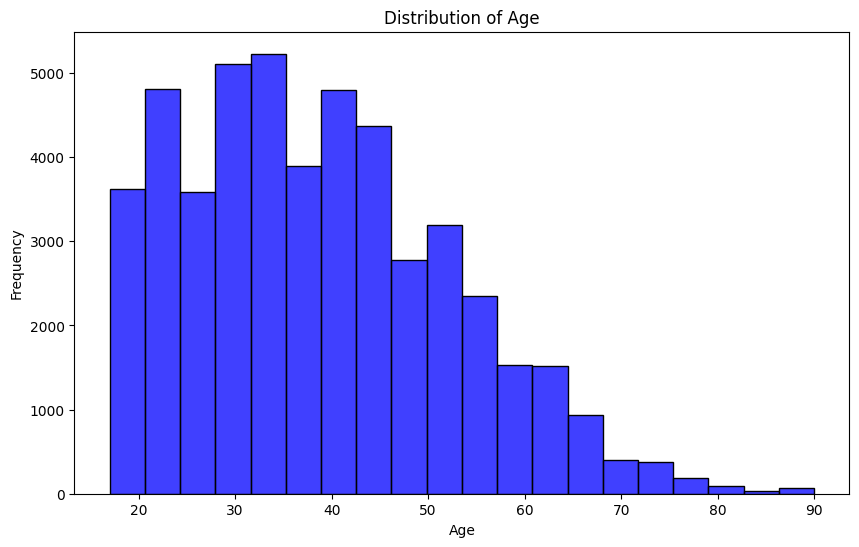

In [174]:
#Plot the ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [175]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [176]:
# Review the categories of Race
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

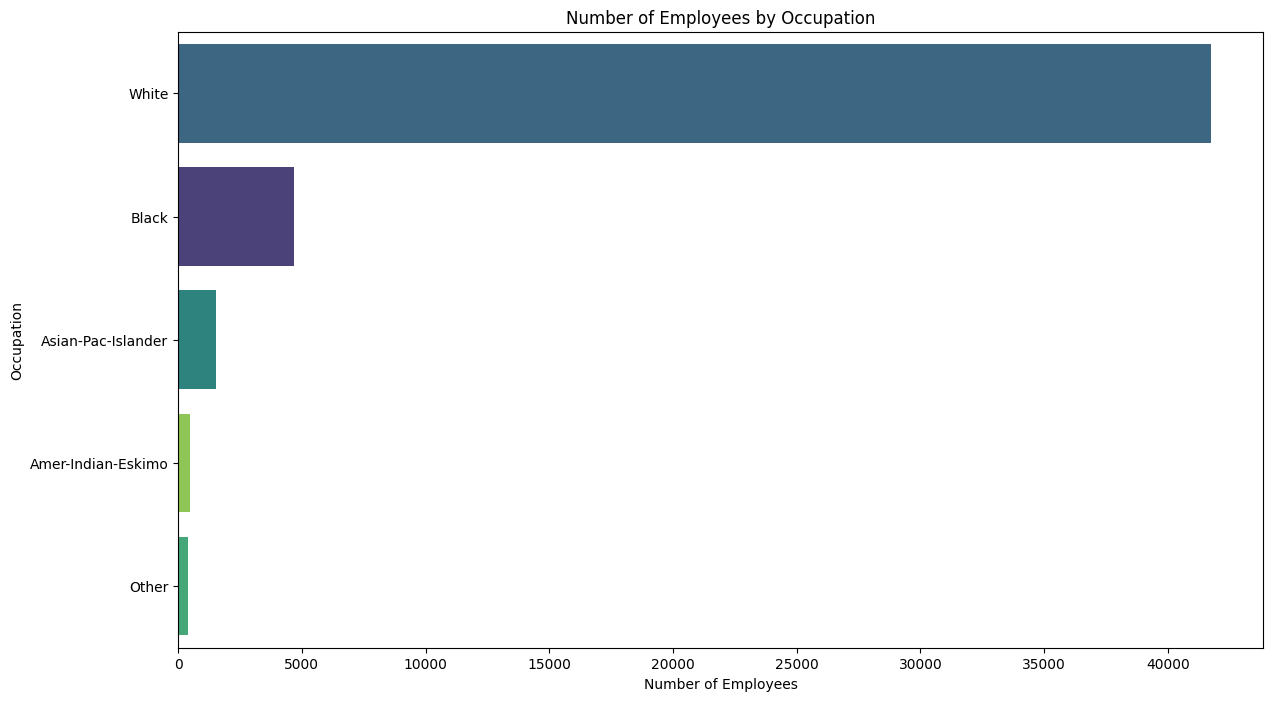

In [177]:
#Plot the countplot of the individuals by race
plt.figure(figsize=(14, 8))
ax = sns.countplot(y='race', data=df, palette='viridis', order=df['race'].value_counts().index, hue='race', dodge=False, legend=False)
plt.title('Number of Employees by Occupation')
plt.xlabel('Number of Employees')
plt.ylabel('Occupation')
plt.show()


In [178]:
#Review the unique categories of hours per week
df['hours-per-week'].unique()


array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95])

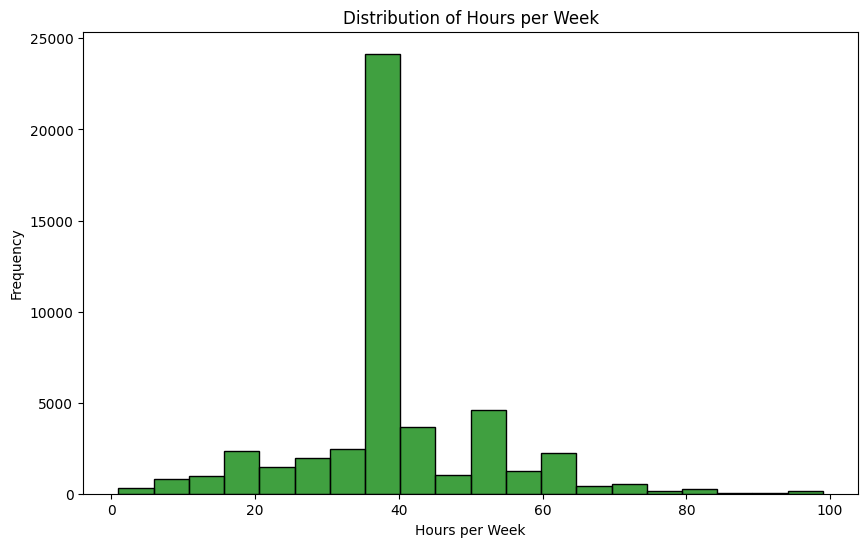

In [179]:
#Plot the distribution of hours per week
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], bins=20, color='green')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  object  
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  category
 4   educational-num  48842 non-null  int64   
 5   marital-status   48842 non-null  object  
 6   occupation       48842 non-null  object  
 7   relationship     48842 non-null  object  
 8   race             48842 non-null  object  
 9   gender           48842 non-null  object  
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  int64   
 13  native-country   48842 non-null  object  
 14  income           48842 non-null  object  
dtypes: category(1), int64(6), object(8)
memory usage: 5.3+ MB


Separate numeric and Categorical Features in 2 dataframes:

In [181]:
# Numeric Df
df_num = df.select_dtypes(include=['number'])

# Categorical Df
df_cat = df.select_dtypes(include=['object', 'category'])

# Include income in both dataframes as this is the response variable
df_num['income'] = df['income']
df_cat['income'] = df['income']


## Categorical Analysis

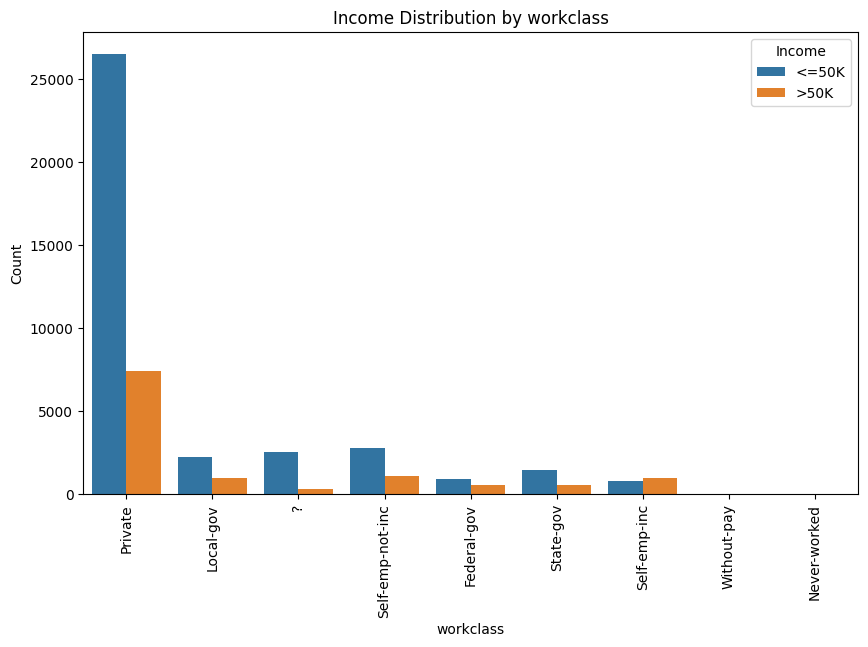

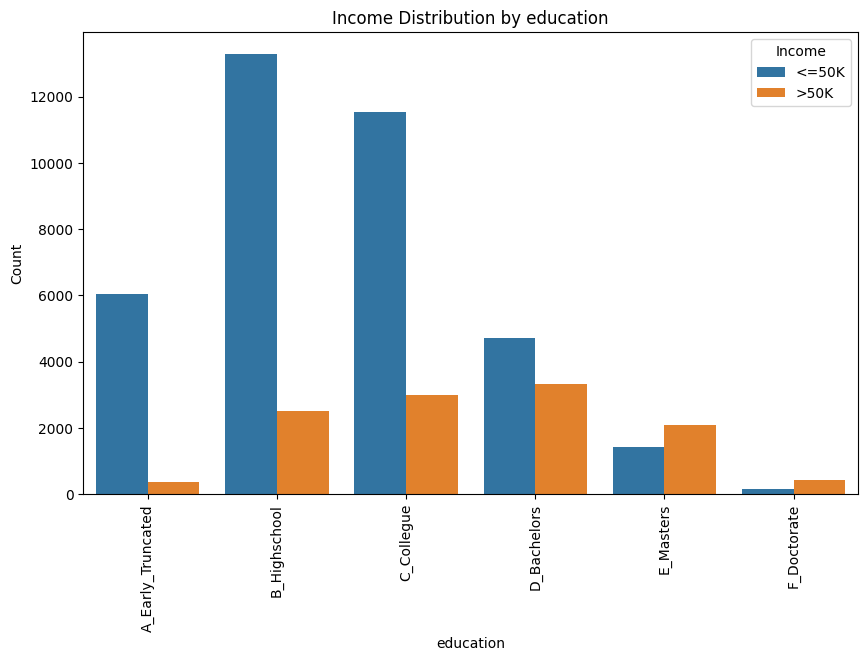

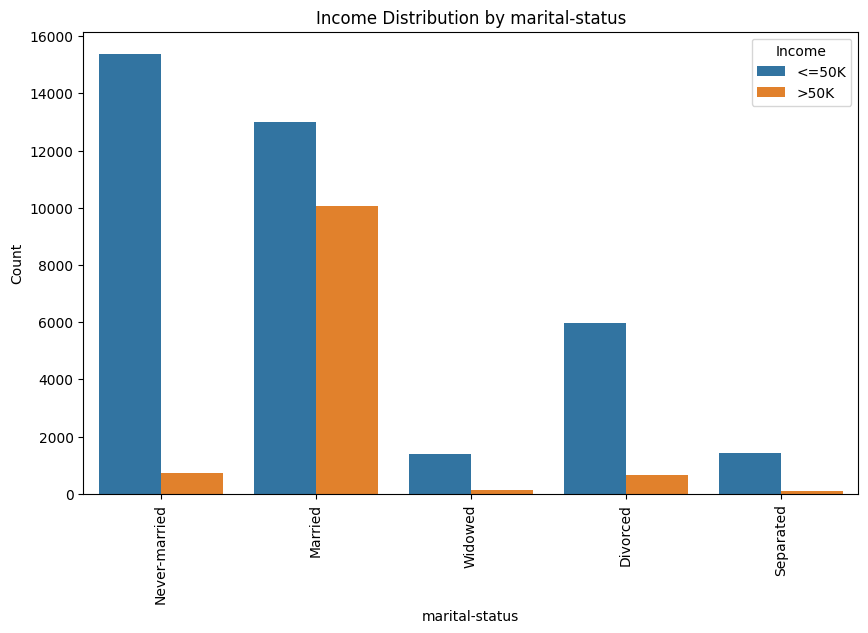

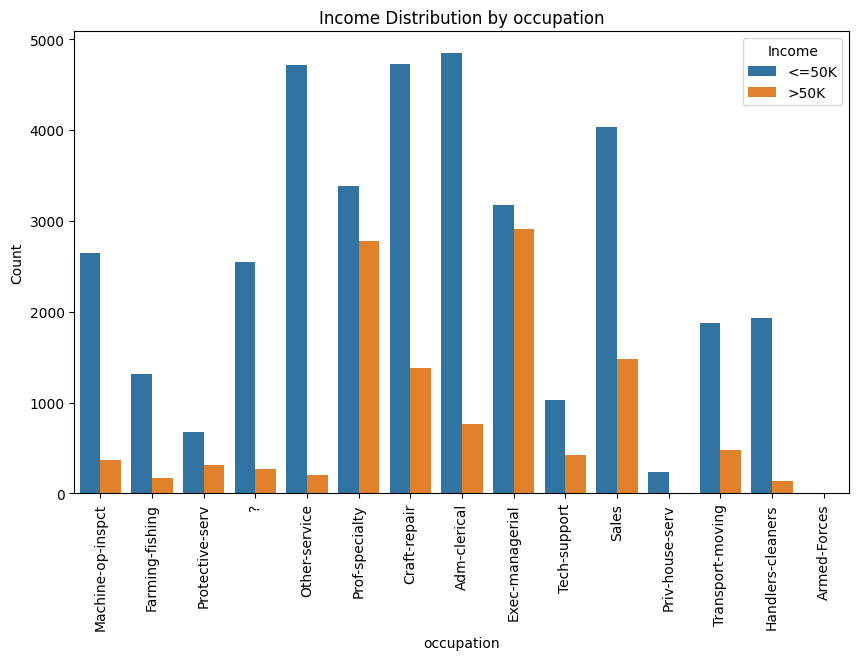

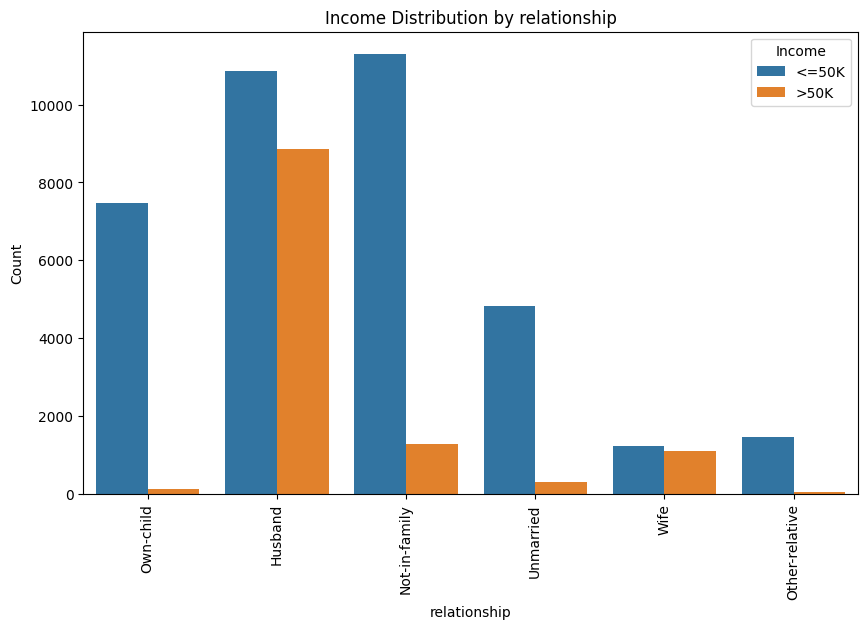

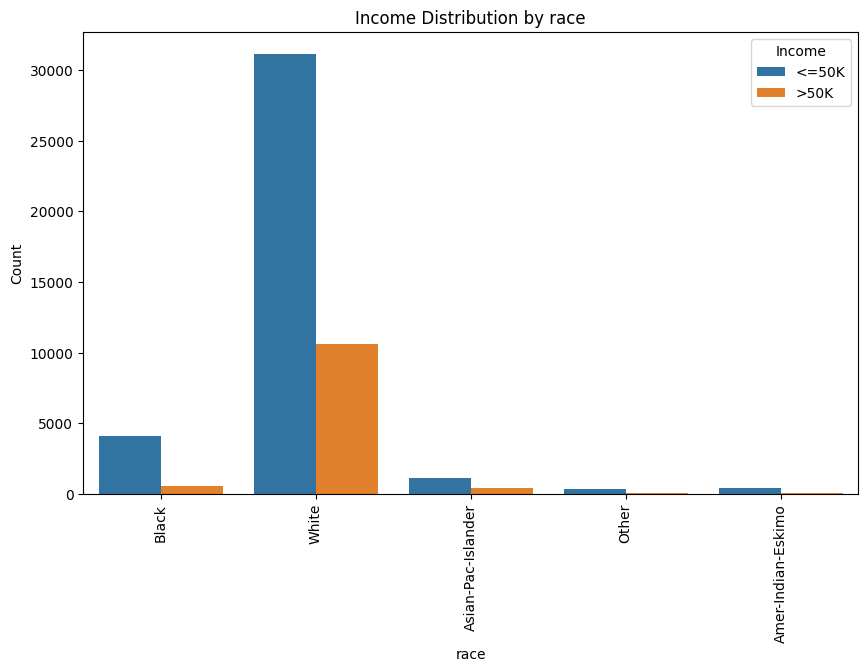

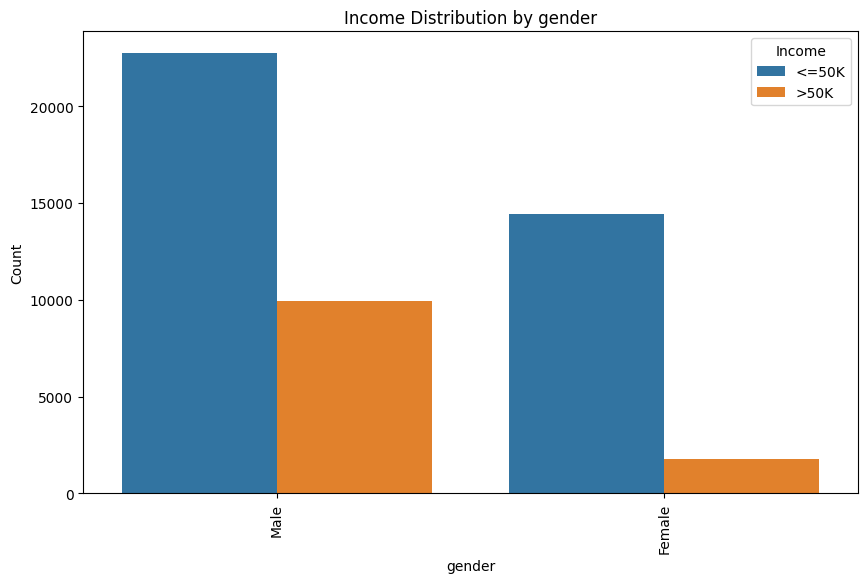

In [182]:
# Lista de columnas categóricas
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender']

# Crear gráficos de barras para cada feature categórico
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cat, x=feature, hue='income')
    plt.title(f'Income Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Income')
    plt.show()

## Conclusions of Categorical Visualizations:

From the categorical Features I can identify some preliminary patterns:

1) Self employment income seems to have a higher proportion of >50k income.

2) Masters and Doctorate have a proportion of >50k Income higher than the rest of the education levels.

3) For some reason Married individuals seem to have a higher proportion of >50k Income

4) Exec-Managerial is the category with the highest proportion of >50k 

5) Husband and Wife Relationship Status also confirm #3 insight.

6) White race has the highest >50k Income proportion.

7) Male Gender shows a higher proportion of >50k Income.

## Numerical Analysis

In [183]:
df_num.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

In [184]:
continuous_features = ['age', 'educational-num', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']


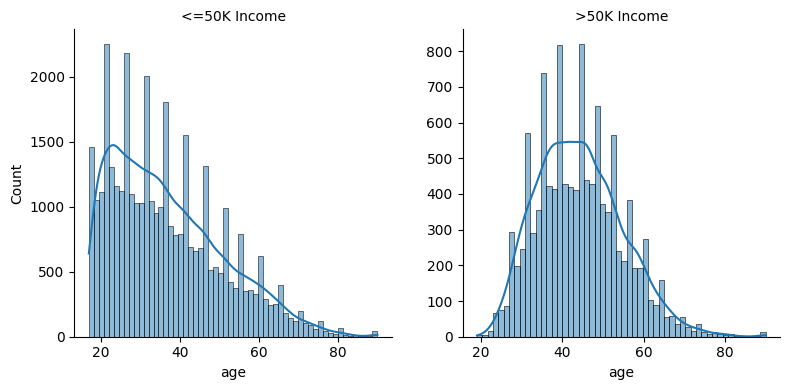

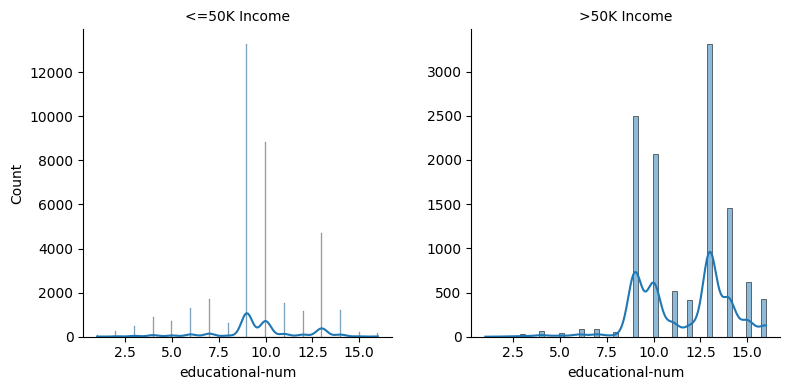

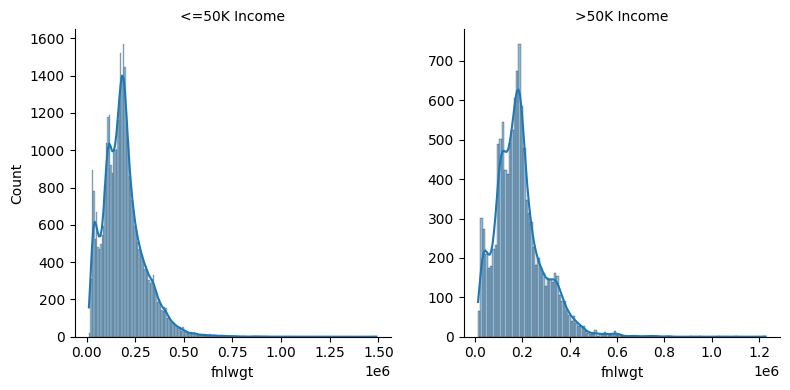

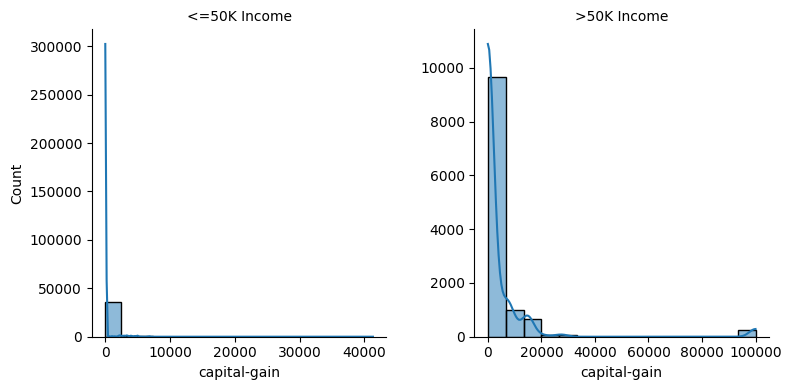

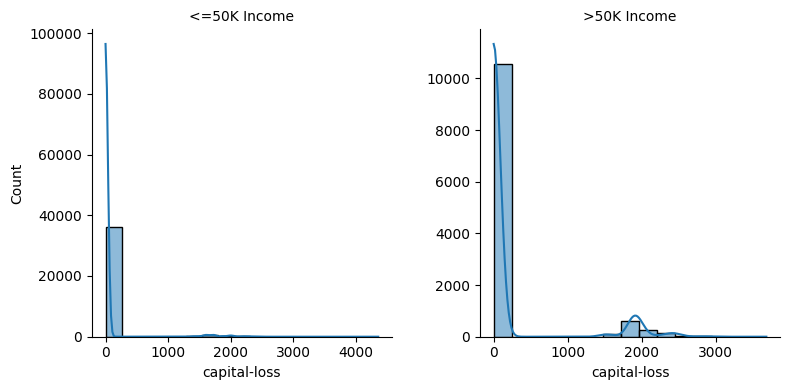

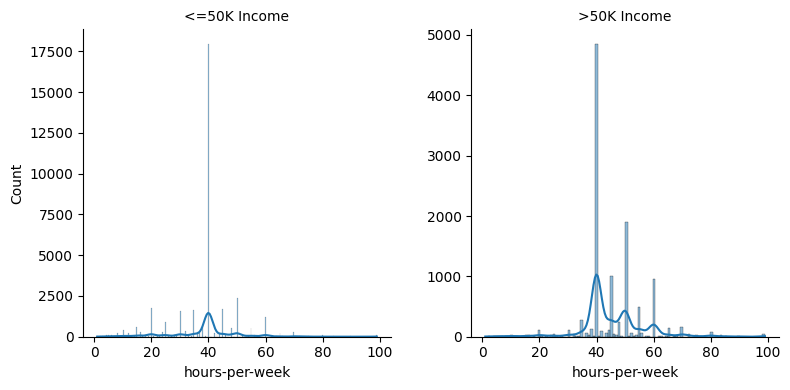

In [185]:
for feature in continuous_features:
    g = sns.FacetGrid(df, col='income', col_wrap=2, height=4, sharex=False, sharey=False)
    g.map_dataframe(sns.histplot, x=feature, kde=True)
    g.set_titles("{col_name} Income")
    g.set_axis_labels(feature, 'Count')
    plt.show()

Capital Loss and Capital Gain have a very large spread, so I will not consider them in the boxplots!

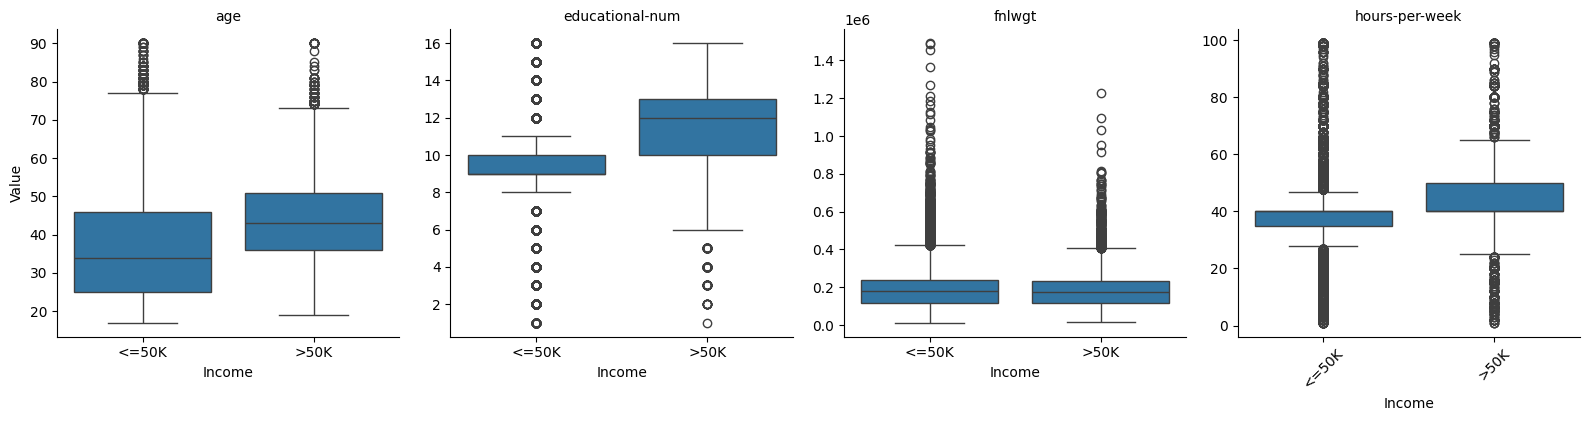

In [186]:
# Choose and melt the Interesting numerical features:

continuous_features = ['age', 'educational-num', 'fnlwgt', 'hours-per-week']
df_melted = pd.melt(df, id_vars='income', value_vars=continuous_features, var_name='feature', value_name='value')

# Create a facegrid with boxplot graphics:

g = sns.FacetGrid(df_melted, col='feature', col_wrap=4, height=4, sharey=False)
g.map(sns.boxplot, 'income', 'value', order=df['income'].unique())
g.set_titles("{col_name}")
g.set_axis_labels('Income', 'Value')
plt.xticks(rotation=45)
plt.show()

## Conclusions on the numerical variables
Income in general looks higher with:
1) More Senior employees
2) More Educated Employees
3) Workers that dedicate more hours per week to work.


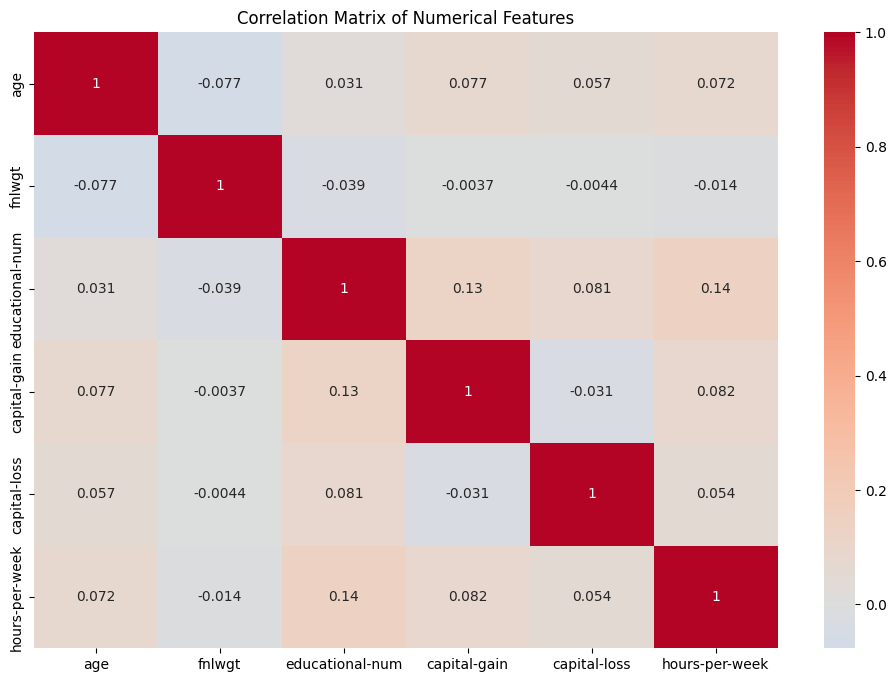

In [191]:
# Correlation matrix between the numerical features, exclusing the income (as this is the response variable)
df_num_no_income = df_num.drop(columns='income')

correlation_matrix = df_num_no_income.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


No pattern or correlation can be found between the numerical variables!


# Answers to the Investigation Questions

### 1. Does the data set include interesting insights?
Yes, the dataset provides several interesting insights. For example, it reveals significant differences in income based on education level, marital status, gender, and occupation. Higher education levels such as Masters and Doctorate are associated with higher income, and certain occupations like executive managerial roles have a higher proportion of individuals earning more than $50K.

### 2. What patterns do I see with histograms, bar-graphs, scatter plots, time series?
- **Histograms**: Show the distribution of continuous variables like age, education years, and hours worked per week. I see some features like Capital Gain and Capital Loss which have a very large spread and don't show an evident pattern.
- **Bar-graphs**: Reveal the count of individuals within each category of a categorical variable, such as education level, work class, and marital status. They highlight that married individuals and those in executive managerial positions tend to have higher incomes.
- **Scatter plots**: This graph helps to identify relationships between two continuous variables, however this was not used in this study as all the numerical variables didn't seem to be correlated.

### 3. Can I see visual comparison between groups?
Yes, visual comparisons between groups are evident:
- **Box plots**: Show the distribution of income across different education levels or occupations.
- **Facet grids**: Display histograms or scatter plots for different income levels or genders, allowing a comparison across multiple groups.
- **Grouped bar charts**: Highlight differences in income distribution among various categories, such as marital status and race.

### 4. Looking at the plots, what are some insights I can make?
Some key insights from the plots include:
- Individuals with higher education levels tend to earn more.
- Certain occupations, such as executive managerial roles, have a higher proportion of high-income earners.
- Married individuals generally have higher incomes compared to unmarried ones.
- There are significant income disparities based on gender and race, with males and White individuals having higher proportions of >$50K income.

### 5. Is there a hypothesis I can - and should - investigate further?
Yes, several hypotheses can be investigated further:
- The impact of higher education levels on income.
- The significant income differences across various occupations.
- The reasons behind the effect of marital status on income levels.
- Gender and race disparities in income and their underlying causes.

### 6. What other questions are the insights leading me to ask?
Based on the insights, additional questions could include:
- What specific factors within education and occupation contribute most to higher income?
- How do other demographic factors, such as region and work hours, influence income?
- Are there interactions between variables (e.g., does the impact of education on income vary by gender or race)?
- How does the income distribution vary across different geographic locations?



## Hypothesis testing:

1) There is a significant gap of income by gender:
###  YES 
2) There is a significant gap by racial condition.
### YES
